# HEX algorithm **Kopuru Vespa Velutina Competition**

**Linear Regression model**

Purpose: Predict the number of Nests in each of Biscay's 112 municipalities for the year 2020.

Output: *(WaspBusters_20210609_batch_OLSm_48019prodigal.csv)*

@authors:
* mario.bejar@student.ie.edu
* pedro.geirinhas@student.ie.edu
* a.berrizbeitia@student.ie.edu
* pcasaverde@student.ie.edu

## Libraries

In [121]:
# Base packages -----------------------------------
import numpy as np
import pandas as pd

# Visualization -----------------------------------
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15, 10) # to set figure size when ploting feature_importance

# Scaling data ------------------------------------
from sklearn import preprocessing

# Linear Regression -------------------------------
from statsmodels.formula.api import ols
#from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

## Functions

In [122]:
# Function that checks if final Output is ready for submission or needs revision   

def check_data(HEX):
    
    def template_checker(HEX):
        submission_df = (HEX["CODIGO MUNICIPIO"].astype("string")+HEX["NOMBRE MUNICIPIO"]).sort_values().reset_index(drop=True)
        template_df = (template["CODIGO MUNICIPIO"].astype("string")+template["NOMBRE MUNICIPIO"]).sort_values().reset_index(drop=True)
        check_df = pd.DataFrame({"submission_df":submission_df,"template_df":template_df})
        check_df["check"] = check_df.submission_df == check_df.template_df
        if (check_df.check == False).any():
            pd.options.display.max_rows = 112
            return check_df.loc[check_df.check == False,:]
        else:  
            return "All Municipality Names and Codes to be submitted match the Template"
    
    print("Submission form Shape is", HEX.shape)
    print("Number of Municipalities is", HEX["CODIGO MUNICIPIO"].nunique())
    print("The Total 2020 Nests' Prediction is", int(HEX["NIDOS 2020"].sum()))

    assert HEX.shape == (112, 3), "Error: Shape is incorrect."
    assert HEX["CODIGO MUNICIPIO"].nunique() == 112, "Error: Number of unique municipalities is correct."    
    return template_checker(HEX)

## Get the data

In [123]:
QUEEN_train = pd.read_csv('../Feeder_months/WBds03_QUEENtrainMONTHS.csv', sep=',')
QUEEN_predict = pd.read_csv('../Feeder_months/WBds03_QUEENpredictMONTHS.csv', sep=',')

clustersMario = pd.read_csv("../auxiliary_files/WBds_CLUSTERSnests.csv")

In [124]:
#QUEEN_predict.isnull().sum()

In [125]:
QUEEN_train.shape

(2688, 43)

In [126]:
QUEEN_predict.shape

(1344, 43)

## Add in more Clusters (nest amount clusters)

In [127]:
QUEEN_train = pd.merge(QUEEN_train, clustersMario, how = 'left', on = ['municip_code', 'municip_name'])
QUEEN_predict = pd.merge(QUEEN_predict, clustersMario, how = 'left', on = ['municip_code', 'municip_name'])

In [128]:
QUEEN_train.fillna(4, inplace=True)
QUEEN_predict.fillna(4, inplace=True)

In [129]:
QUEEN_train.shape

(2688, 44)

In [130]:
QUEEN_predict.shape

(1344, 44)

In [131]:
#QUEEN_train.isnull().sum()

In [132]:
#QUEEN_predict.isnull().sum()

In [133]:
QUEEN_train.Cluster.value_counts()

0.0    1584
2.0     984
1.0      96
4.0      24
Name: Cluster, dtype: int64

## Determine feature importance

In [134]:
X = QUEEN_train.drop(columns = ['municip_name', 'municip_code', 'NESTS', 'station_code', 'station_name', 'year'])

In [135]:
y = QUEEN_train['NESTS']

In [136]:
# Scale the datasets using MinMaxScaler

scalators = X.columns
X[scalators] = preprocessing.minmax_scale(X[scalators])

In [137]:
# define the model
model_fi = LinearRegression()

# fit the model
model_fi.fit(X, y)

# get importance
importance = model_fi.coef_

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0s, Score: %.5f' % (X.columns[i],v))

Feature: month, Score: 1.54742
Feature: year_offset, Score: -1.62654
Feature: colonies_amount, Score: 1.64459
Feature: food_fruit, Score: 2.29941
Feature: food_apple, Score: -1.12020
Feature: food_txakoli, Score: 1.18769
Feature: food_kiwi, Score: -0.05182
Feature: food_pear, Score: 0.37333
Feature: food_blueberry, Score: 1.24348
Feature: food_raspberry, Score: 1.06059
Feature: weath_days_frost, Score: 0.51725
Feature: weath_humidity, Score: 1.43421
Feature: weath_maxLevel, Score: 1.84008
Feature: weath_midLevel, Score: -1.62255
Feature: weath_minLevel, Score: -0.88248
Feature: weath_days_rain, Score: -0.59654
Feature: weath_days_rain1mm, Score: 0.42149
Feature: weath_accuRainfall, Score: 1.64616
Feature: weath_10minRainfall, Score: -0.85979
Feature: weath_1dayRainfall, Score: -1.02334
Feature: weath_solar, Score: 0.05157
Feature: weath_meanTemp, Score: -8.89484
Feature: weath_maxTemp, Score: 0.55743
Feature: weath_maxMeanTemp, Score: 3.66499
Feature: weath_minTemp, Score: 9.49536
Feat

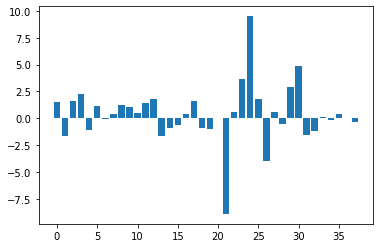

In [138]:
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [139]:
for i,v in enumerate(importance):
    if v > 1:
        print('Feature: %0s, Score: %.2f' % (X.columns[i],v))

Feature: month, Score: 1.55
Feature: colonies_amount, Score: 1.64
Feature: food_fruit, Score: 2.30
Feature: food_txakoli, Score: 1.19
Feature: food_blueberry, Score: 1.24
Feature: food_raspberry, Score: 1.06
Feature: weath_humidity, Score: 1.43
Feature: weath_maxLevel, Score: 1.84
Feature: weath_accuRainfall, Score: 1.65
Feature: weath_maxMeanTemp, Score: 3.66
Feature: weath_minTemp, Score: 9.50
Feature: weath_meanWindM, Score: 1.84
Feature: cluster_size, Score: 2.93
Feature: cluster_cosmo, Score: 4.91


## Train the model

### With the variables suggested by the Feature Importance method

In [140]:
#model = ols('NESTS ~ month + colonies_amount + food_fruit + food_txakoli + food_blueberry + food_raspberry + weath_humidity + weath_maxLevel + weath_accuRainfall + weath_maxMeanTemp + weath_minTemp + weath_meanWindM + C(cluster_cosmo) + C(cluster_size)',\
#            data=QUEEN_train).fit()
#print(model.summary())

In [141]:
#model = ols('NESTS ~ weath_meanTemp + weath_maxMeanTemp + weath_minTemp + weath_maxWindM + C(cluster_cosmo) + C(cluster_size)',\
#            data=QUEEN_train).fit()
#print(model.summary())

### Backward elimination

In [142]:
#model = ols('NESTS ~ month + food_txakoli + food_blueberry + food_raspberry + weath_humidity + weath_accuRainfall + weath_maxMeanTemp + weath_minTemp + weath_meanWindM + C(cluster_cosmo) + C(cluster_size)',\
#            data=QUEEN_train).fit()
#print(model.summary())

In [143]:
#model = ols('NESTS ~ weath_meanTemp + weath_maxMeanTemp + weath_minTemp + C(cluster_cosmo) + C(cluster_size)',\
#            data=QUEEN_train).fit()
#print(model.summary())

### With the additional Cluster Categorical for nest amounts

In [144]:
model = ols('NESTS ~ month + food_txakoli + food_blueberry + food_raspberry + weath_humidity + weath_accuRainfall + weath_maxMeanTemp + weath_minTemp + weath_meanWindM + C(cluster_cosmo) + C(cluster_size) + C(Cluster)',\
            data=QUEEN_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  NESTS   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     113.9
Date:                Thu, 03 Jun 2021   Prob (F-statistic):          2.33e-300
Time:                        10:43:34   Log-Likelihood:                -6583.0
No. Observations:                2688   AIC:                         1.320e+04
Df Residuals:                    2670   BIC:                         1.331e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -4.25

In [145]:
#model = ols('NESTS ~ weath_meanTemp + weath_maxMeanTemp + weath_minTemp + C(cluster_cosmo) + C(cluster_size) + C(Cluster)',\
#            data=QUEEN_train).fit()
#print(model.summary())

## Predict 2020's nests

In [146]:
y_2020 = model.predict(QUEEN_predict)
y_2020

0       0.745390
1       0.537833
2       0.761791
3       1.330356
4       1.942334
          ...   
1339    2.401594
1340    2.239539
1341    2.211849
1342    2.172490
1343    1.703096
Length: 1344, dtype: float64

In [147]:
# Any municipality/month resulting in NESTS<0 is equivalent to = 0

y_2020[y_2020 < 0] = 0
y_2020

0       0.745390
1       0.537833
2       0.761791
3       1.330356
4       1.942334
          ...   
1339    2.401594
1340    2.239539
1341    2.211849
1342    2.172490
1343    1.703096
Length: 1344, dtype: float64

In [148]:
QUEEN_predict['NESTS'] = y_2020

In [149]:
HEX = QUEEN_predict.loc[:,['municip_code','municip_name','NESTS']].groupby(by=['municip_code','municip_name'], as_index=False).sum()

## Manual adjustments

In [150]:
HEX.loc[HEX.municip_code.isin([48022, 48071, 48088, 48074, 48051, 48020]), :]

,municip_code,municip_name,NESTS
19,48020,Bilbao,7.553015
21,48022,Karrantza Harana/Valle de Carranza,22.209685
50,48051,Lanestosa,14.680585
70,48071,Muskiz,16.258253
73,48074,Urduña/Orduña,21.278503
87,48088,Ubide,10.897701


In [151]:
HEX.loc[HEX.municip_code.isin([48022, 48071, 48088, 48074, 48051, 48020]), 'NESTS'] = 0

In [152]:
HEX.loc[HEX.municip_code.isin([48022, 48071, 48088, 48074, 48051, 48020]), :]

,municip_code,municip_name,NESTS
19,48020,Bilbao,0.0
21,48022,Karrantza Harana/Valle de Carranza,0.0
50,48051,Lanestosa,0.0
70,48071,Muskiz,0.0
73,48074,Urduña/Orduña,0.0
87,48088,Ubide,0.0


In [153]:
HEX.columns = ["CODIGO MUNICIPIO", "NOMBRE MUNICIPIO", "NIDOS 2020"] # change column names to Spanish (Competition template)

## Verify dataset format

In [154]:
check_data(HEX)

(112, 3) : Shape is correct.
112 : Number of unique municipalities is correct.
Great! All municipalities have NESTS >= 0.
The Total 2020 Nests' Prediction is 2980


## Export dataset for submission

In [155]:
HEX.to_csv('WaspBusters_20210609_batch_OLSy_48019prodigal.csv', index=False)